# Transmon Analytics: Plotting Eigenvalues as a Function of Offset Charge  

This demo notebook uses the Hamiltonian Cooper Pair Box (Hcpb) class to recreate the plots of energy as a function of offset charge, originally found in Koch et al. Phys. Rev. A 76, 042319 (2007). 

We'll start by importing the Hcpb class as well as numpy and matplotlib: 

In [1]:
from qiskit_metal.analyses.hamiltonian.transmon_charge_basis import Hcpb
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

We'll use the variable x to represent the offset charge (ng, measured in units of Cooper pair charge: 2e) which we'll have vary between -2 and 2:  

In [2]:
# We'll use the variable x to represent the offset charge (ng), which will vary from -2.0 to 2.0 
x = np.linspace(-2.0,2.0,101)

Next, we'll define a value for the Josephson Energy (E_J) as well as the ratio between the Josephson Energy and the Charging Energy. We will see that the ratio of E_J/E_C controls the anharmonicity of the qubit as well as the dispersion. 

In [3]:
# Define a value of the Josephson Energy (E_J) as well as the ratio between the E_J and the Charging Energy (E_C): 
E_J = 1000.0 
ratio = 1.0 
E_C = E_J/ratio 

Now we will actually use the Hcpb class to calculate the transmon eigenvalues for a given value of offset charge. Note that in the plots found in the original paper, the eigenvalues are normalized by 0->1 transition energy evaluated at an offset charge of ng=0.5, so we first calculate that value and use it for normalization later. We create three empty lists, one for each energy level, then populate the lists with the corresponding eigenvalues for a given offset charge. Lastly, we calculate the minimum value of the lowest energy eigenvalue (called "floor") and set this to E=0 in our final plots.  

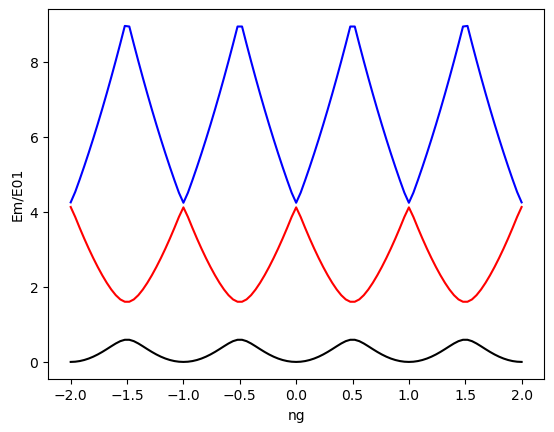

In [5]:
# we'll normalize the calculated energies by the 0->1 transition state energy evaluated at the degenercy point (ng=0.5)
H_norm = Hcpb(nlevels=2, Ej=E_J, Ec=E_C, ng=0.5)
norm = H_norm.fij(0,1)

# Next we'll empty lists to the first three eigenvalues (m=0, m=1, m=2):
E0 = [] 
E1 = [] 
E2 = []

# For a given value of offset charge (ng, represented by x) we will calculate the CPB Hamiltonian using the previously assigned values of E_J and E_C. Then we calculate the eigenvalue for a given value of m.
for i in x: 
    H = Hcpb(nlevels=3, Ej=E_J, Ec=E_C, ng=i)
    E0.append(H.evalue_k(0)/norm)
    E1.append(H.evalue_k(1)/norm)
    E2.append(H.evalue_k(2)/norm)

# define the minimum of E0 and set this to E=0
floor = min(E0) 
 
plt.plot(x, E0 - floor, 'k')
plt.plot(x, E1 - floor, 'r')
plt.plot(x, E2 - floor, 'b')
plt.xlabel("ng")
plt.ylabel("Em/E01")
plt.show()

You can vary the value of ratio to 5.0, 10.0 and 50.0 to verify that the generated plots match those found in the original paper. 